For the data from Lab 1 (S1, S2, m1, m2, n1, n2), plot the effectiveness of the k-nn classifier as a function of the number of nearest neighbors from nn=1 to nn=21. Do the same for the TP and TN values. Then draw an additional 10 points from class 1 and 5 points from class 2, treat them as a set of tets and repeat the graphs. If possible, perform averaging after 10 draws.

In [60]:
#importing Libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [61]:
#create data (Gaussian distribution) from two classes
def draw_data(n1, n2, m1, m2, S1, S2):
    data1 = np.random.multivariate_normal(m1, S1, n1)
    data2 = np.random.multivariate_normal(m2, S2, n2)
    data = np.concatenate((data1, data2), axis = 0)
    data = pd.DataFrame(data, columns=["x", "y"])
    data["group"] = np.repeat([0, 1], [n1, n2])
    
    return data

m1, m2 = [-1, -1], [2, 2] #mean
S1 = [[4, 2], [2, 4]] #covariance matrix
S2 = [[4, 2], [2, 4]]
n1, n2 = 30, 20 #number of points

In [62]:
#building confusion matrix
def CM_large(x, y): 
    cm = pd.crosstab(x, y) #basic cm
    # print(cm)
    tn, tp = np.diag(cm) #true negative, true positive
    acc = np.diag(cm).sum() / cm.to_numpy().sum() #accuracy
    
    return [acc, tn, tp]

In [63]:
data_test1 = data[y == 0].sample(n=10)
data_test2 = data[y == 1].sample(n=5)
data_test=pd.concat([data_test1,data_test2])
y_test=data_test.group
X_test=data_test[["x", "y"]]

data_test

,x,y,group
17,0.957933,2.795083,0
9,-3.610343,-4.548972,0
10,0.394233,-0.824706,0
16,-1.790731,-3.123213,0
26,-4.397650,-1.619027,0
14,1.403995,-0.473045,0
24,-0.998922,-0.242076,0
8,0.787724,0.031339,0
15,-3.388915,-0.228252,0
7,-2.515709,0.384428,0


In [64]:
data_test = draw_data(10, 5, m1, m2, S1, S2)
X_test=data_test[["x", "y"]]
y_test=data_test.group

data_test

,x,y,group
0,1.315850,0.945931,0
1,-0.981942,-3.412621,0
2,0.716550,-1.248344,0
3,-2.962703,0.349100,0
4,3.042859,3.392992,0
5,0.505631,-1.218943,0
6,-2.492707,-1.172833,0
7,2.417696,1.475325,0
8,-5.741287,-0.920763,0
9,-1.881828,-4.550207,0


In [65]:
#nn - nearest neighbours
nn=np.arange(1,22)

#empty np arrays
knn_all=np.zeros(shape=(22,3))
knn_all_test=np.zeros(shape=(22,3))


for i in range(10): #running results 10 times to get mean
    #creating data 
    data = draw_data(n1, n2, m1, m2, S1, S2)
    X = data[["x", "y"]]
    y = data.group

    # option 1 - generation of new points for the test
    data_test = draw_data(10, 5, m1, m2, S1, S2)
    X_test=data_test[["x", "y"]]
    y_test=data_test.group
    
    #option 2 - checking on a smaller number of points from an already existing pool
    # data_test1 = data[y == 0].sample(n=10)
    # data_test2 = data[y == 1].sample(n=5)
    # data_test=pd.concat([data_test1,data_test2])
    # y_test=data_test.group
    # X_test=data_test[["x", "y"]]

    knn_data=np.zeros(shape=(22,3))
    knn_data_test=np.zeros(shape=(22,3))
    
    for j in nn:
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X, y)
        klasy_knn = knn.predict(X)
        klasy_knn_test=knn.predict(X_test)
        knn_data[j] = (CM_large(y,klasy_knn))
        knn_data_test[j] = (CM_large(y_test,klasy_knn_test))
    knn_all=np.add(knn_all,knn_data)
    knn_all_test=np.add(knn_all_test,knn_data_test)
knn_all=knn_all/10
knn_all_test=knn_all_test/10


In [66]:
#results based on original data
df = pd.DataFrame(knn_all, columns =['acc', 'tn', 'tp'], dtype = float)
df=df.drop([0])
# print(df)

#results based on test data
df1 = pd.DataFrame(knn_all_test, columns =['acc', 'tn', 'tp'], dtype = float)
df1=df1.drop([0])
# print(df1)

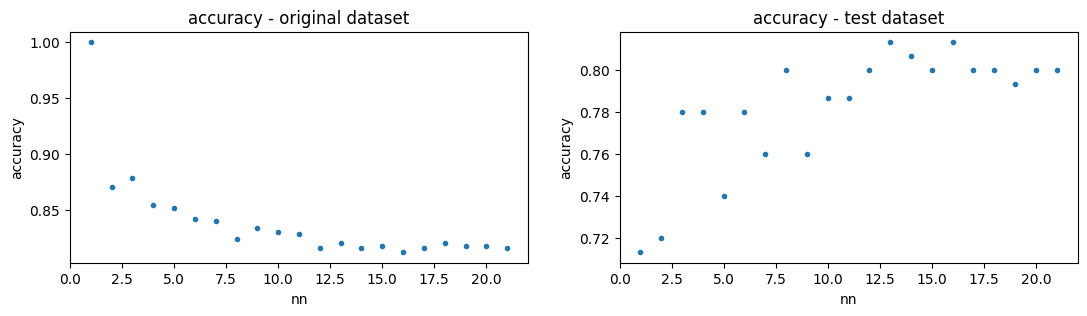

In [67]:
# plotting accuracy

plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['acc'].plot(style=".")
plt.title("accuracy - original dataset")
plt.xlabel('nn')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
df1['acc'].plot(style=".")
plt.title("accuracy - test dataset")
plt.xlabel('nn')
plt.ylabel('accuracy')
plt.show()

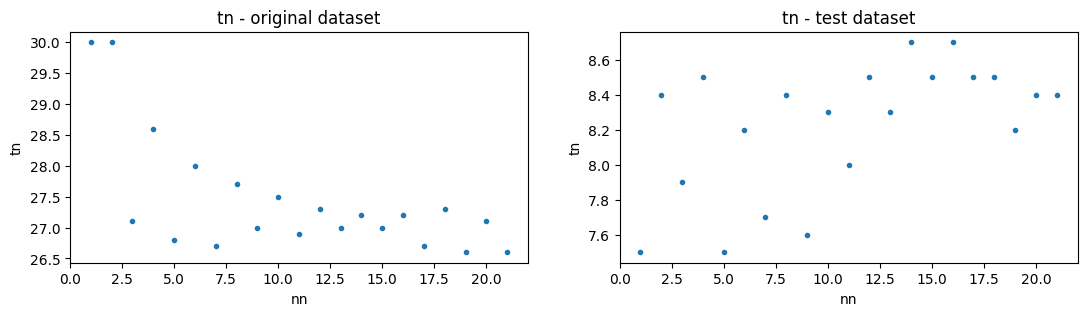

In [68]:
# plotting true negative 
plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['tn'].plot(style=".")
plt.title("tn - original dataset")
plt.xlabel('nn')
plt.ylabel('tn')
plt.subplot(1,2,2)
df1['tn'].plot(style=".")
plt.title("tn - test dataset")
plt.xlabel('nn')
plt.ylabel('tn')
plt.show()

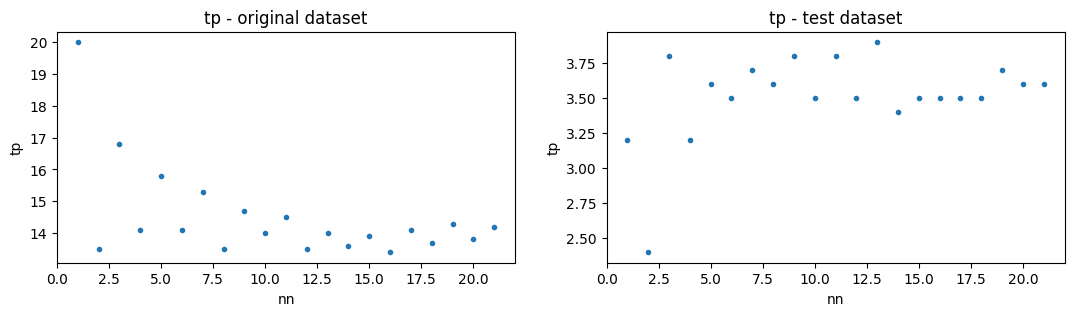

In [69]:
# plotting true positive
plt.figure(figsize=(13,3))

plt.subplot(1,2,1)
df['tp'].plot(style=".")
plt.title("tp - original dataset")
plt.xlabel('nn')
plt.ylabel('tp')
plt.subplot(1,2,2)
df1['tp'].plot(style=".")
plt.title("tp - test dataset")
plt.xlabel('nn')
plt.ylabel('tp')
plt.show()

results: when test dataset is baset on original dataset - model 'remembers' results, accuracy==1 with 1 nn and gets worse with nn increasing.
using different data in model validation shows real results - which are better when nn is high. 